In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Amount distribution')

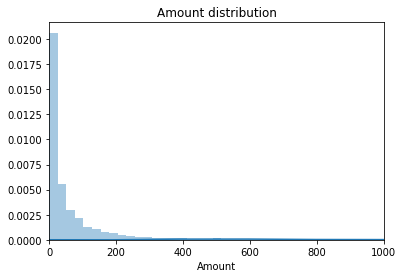

In [4]:
sns.distplot(df.Amount, bins=1000)
plt.xlim(0,1000)
plt.title('Amount distribution')

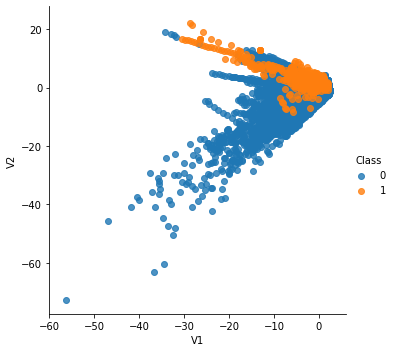

In [5]:
sns.lmplot('V1', 'V2', data=df, hue='Class',fit_reg=False)

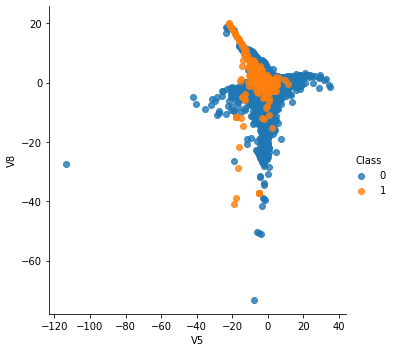

In [6]:
sns.lmplot('V5', 'V8', data=df, hue='Class',fit_reg=False)

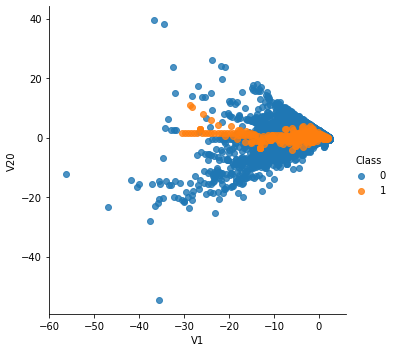

In [7]:
sns.lmplot('V1', 'V20', data=df, hue='Class',fit_reg=False)

In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
from sklearn.utils import resample

In [10]:
# Separate majority and minority classes
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]
df_minority.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [11]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=284315,random_state=123) 
df_minority_upsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
182992,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
197586,132086.0,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1
151196,94952.0,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,...,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,571.48,1
263080,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
30442,35926.0,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1


In [12]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# Display new class counts
df_upsampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

## Logistic Regression Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()

In [16]:
# Separate input features (X) and target variable (y)
y = df_upsampled.Class
X = df_upsampled.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train model
Lrc = LogisticRegression().fit(X_train, y_train)

C:\Users\tejas\.conda\envs\project\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
# Predict on training set
cross_val_score(Lrc, X, y, cv= 10)

C:\Users\tejas\.conda\envs\project\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tejas\.conda\envs\project\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tejas\.conda\envs\project\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tejas\.conda\envs\project\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tejas\.conda\envs\project\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

array([0.87315349, 0.92297411, 0.92772228, 0.93384215, 0.94479811,
       0.94108543, 0.9457986 , 0.9443741 , 0.94970279, 0.95817945])

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
lr_pred = Lrc.predict(X_test)

In [20]:
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[91115  2449]
 [ 9304 84780]]


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     93564
           1       0.97      0.90      0.94     94084

    accuracy                           0.94    187648
   macro avg       0.94      0.94      0.94    187648
weighted avg       0.94      0.94      0.94    187648



## Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Separate input features (X) and target variable (y)
y = df_upsampled.Class
X = df_upsampled.drop('Class', axis=1)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
# Train model
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

C:\Users\tejas\.conda\envs\project\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
# Predict on training set
cross_val_score(Rfc.fit(X_train, y_train), X, y, cv= 10)

array([0.94043683, 0.99996483, 0.99998241, 1.        , 0.99996483,
       0.99978896, 0.99998241, 1.        , 1.        , 0.99998241])

In [27]:
rf_pred = Rfc.predict(X_test)

In [27]:
print(confusion_matrix(y_test, rf_pred))
print('\n')
print(classification_report(y_test, rf_pred))

[[93915    11]
 [    0 93722]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93926
           1       1.00      1.00      1.00     93722

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648



## SVC Model

In [28]:
# Getting two more libs
import sklearn
from sklearn.model_selection  import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [29]:
# Calling model
svc = SVC()

y = df_upsampled.Class
X = df_upsampled.drop(df_upsampled[['Class','Time','Amount']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [30]:
# standardizing data
ss = StandardScaler().fit_transform(X_train)

In [31]:
# debugging
sklearn_pca = sklearn.decomposition.PCA(n_components=5)

# fitting our x training data to pca
Y_sklearn = sklearn_pca.fit_transform(ss)

# adding results to a new data frame
X_PCA = pd.DataFrame(Y_sklearn)

print( 'The percentage of total variance in the dataset explained by each','component from Sklearn PCA.\n', sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.40347692 0.10354643 0.07343801 0.05812938 0.05395444]


In [32]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [33]:
# setting grid search with model 
grid = GridSearchCV(SVC(),param_grid,verbose=3)

## KNN Model

In [ ]:
from sklearn import neighbors

In [ ]:
# setting up knn regression model, using the 5 nearest neighbors weighted by distance
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
# training our model with our training data
knn.fit(X_train, y_train)

In [ ]:
cross_val_score(knn.fit(X_train, y_train), X, y, cv=6)

In [ ]:
param_grid = {'n_neighbors':[1,3,5,10,15,20,25,30,40,50,75,100],'weights':['uniform','distance']}

In [ ]:
KNN = neighbors.KNeighborsClassifier()

In [ ]:
# setting grid search with model and params to test
grid = GridSearchCV(KNN,param_grid,verbose=3)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
# testing the grid predictions v test data
grid_pred = grid.predict(X_test)

In [ ]:
# model evaluation
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))